In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [1]:
# install joblib for saving
# Restart kernel after installing 
!pip install joblib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

In [9]:
#Messed up the path somehow (duplicated file and placed in same folder)
df = pd.read_csv("../../../data/ml_compile.csv")

In [10]:
df['year'] = pd.DatetimeIndex(df['year_month']).year
df['month']= pd.DatetimeIndex(df['year_month']).month

# Machine Learning: Climate x Mobility

In [11]:
df = df [['land_avg_temp', 'land_ocean_avg_temp', 'global_avg_co2', 'seaice_extent',
       'avg_distance_traveled']]

In [12]:
#Drop null values
df.describe()

,land_avg_temp,land_ocean_avg_temp,global_avg_co2,seaice_extent,avg_distance_traveled
count,1392.000000,1392.000000,752.000000,506.000000,8.400000e+01
mean,8.762454,15.317030,355.582926,11.405146,5.916332e+08
std,4.199958,1.259405,28.949294,3.252910,6.769937e+08
min,1.395000,12.839000,312.430000,3.565600,1.784230e+05
25%,4.655750,14.150750,329.112500,8.571152,1.296206e+08
50%,9.087500,15.373000,352.880000,12.095933,2.588397e+08
75%,12.953000,16.477750,378.857500,14.318582,9.286488e+08
max,15.482000,17.611000,417.070000,16.341938,2.617030e+09


In [13]:
df = df.dropna(axis = 0)
df.describe()

,land_avg_temp,land_ocean_avg_temp,global_avg_co2,seaice_extent,avg_distance_traveled
count,81.000000,81.000000,81.000000,81.000000,8.100000e+01
mean,9.790259,15.928580,394.353704,10.562315,6.017928e+08
std,4.163228,1.244731,4.791289,3.476053,6.840158e+08
min,3.157000,13.859000,384.430000,3.565600,1.784230e+05
25%,6.101000,14.863000,390.280000,7.454839,1.324565e+08
50%,10.256000,15.962000,394.190000,11.320267,2.650700e+08
75%,14.201000,17.203000,398.010000,13.729419,9.822863e+08
max,15.482000,17.611000,403.960000,15.196258,2.617030e+09


## Preprocessing the Data

### Assign X(features) and y(target) data

In [14]:
X = df[['land_avg_temp',
       'land_ocean_avg_temp', 'global_avg_co2',
       'seaice_extent']]
y = df["avg_distance_traveled"].values.reshape(-1, 1)

print(X.shape, y.shape)

(81, 4) (81, 1)


### Split the data into testing and training dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_test, y_var_train, y_var_test = train_test_split(X, y_var, test_size=0.2, random_state=42)

### MinMaxScalar to fit and transform X features and y target

In [16]:
#Fit Transform using MinMaxScalar for X features
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

#Target value #1
y_train_minmax = y_minmax.transform(y_train)
y_test_minmax = y_minmax.transform(y_test)

## Multiple Linear Regression Analysis
### Resource Selection Factor Mean

In [17]:
# Creat model and fit to scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_minmax, y_train_minmax)

LinearRegression()

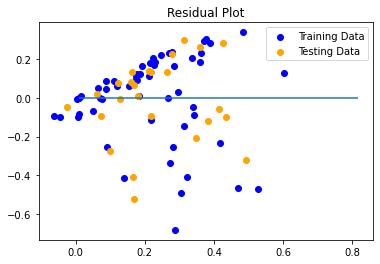

In [18]:
# Make Prediction using a FIT model and plot ==SEE BELOW FOR ALTERNATIVES==
predictions = model.predict(X_test_minmax)
model.fit(X_train_minmax, y_train_minmax)

plt.scatter(model.predict(X_train_minmax), model.predict(X_train_minmax) - y_train_minmax, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_minmax), model.predict(X_test_minmax) - y_test_minmax, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_minmax.min(), xmax=y_test_minmax.max())
plt.title("Residual Plot")
plt.show()

In [19]:
# Validate the Model with MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_minmax, predictions)
r2 = model.score(X_test_minmax, y_test_minmax)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.043948391611075006, R2: 0.21651347306464508


## Categorical Algorithms
### Preprocessing - Transform RSF values to Categorical

In [20]:
df["avg_distance_traveled"].describe()

count    8.100000e+01
mean     6.017928e+08
std      6.840158e+08
min      1.784230e+05
25%      1.324565e+08
50%      2.650700e+08
75%      9.822863e+08
max      2.617030e+09
Name: avg_distance_traveled, dtype: float64

In [21]:
conditions = [(df["avg_distance_traveled"] < 1.5e+08 ), (df["avg_distance_traveled"] > 1.5e+08 ) & (df["avg_distance_traveled"] < 8e+08 ), (df["avg_distance_traveled"] > 8e+08)]
values = ['low', 'mid', 'high']
df["avg_distance_traveled"] = np.select(conditions,values)

In [23]:
df_cat = df [['land_avg_temp', 
       'land_ocean_avg_temp', 'global_avg_co2',
       'seaice_extent','avg_distance_traveled']]

### Assign new variables

In [24]:
X = df_cat[['land_avg_temp', 
       'land_ocean_avg_temp', 'global_avg_co2',
       'seaice_extent']]
y_cat = df_cat["avg_distance_traveled"]
print(X.shape, y_cat.shape)

(81, 4) (81,)


### Split the data into testing and training dataset

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_cat_train, y_cat_test = train_test_split(X, y_cat, test_size=0.5, random_state=42)

### MinMaxScalar to fit and transform X features and y target

In [26]:
#Fit Transform using MinMaxScalar for X features
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

## 1. Logistic Regression Analysis

In [27]:
# Creat model and fit to scaled training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_minmax, y_cat_train)
print(f"Training Data Score: {classifier.score(X_train, y_cat_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_cat_test)}")

Training Data Score: 0.4
Testing Data Score: 0.21951219512195122


## 2. Random Forest Analysis

In [28]:
from sklearn.ensemble import RandomForestClassifier
y_cat_rf = df_cat["avg_distance_traveled"]

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_minmax, y_cat_train)
score = rf.score(X_test_minmax, y_cat_test)

In [29]:
importances = rf.feature_importances_
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.32514233702593187, 'seaice_extent'),
 (0.2563449672943133, 'global_avg_co2'),
 (0.21295210979154686, 'land_ocean_avg_temp'),
 (0.20556058588820791, 'land_avg_temp')]

In [30]:
print(f"Random Forest Testing Score: {score}")

Random Forest Testing Score: 0.5365853658536586


### hypertune the model

In [31]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [32]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 60, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 650, 1100, 1550, 2000]}


### Label encoding y_cat

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_cat_train)

encoded_y_train = label_encoder.transform(y_cat_train)
encoded_y_test = label_encoder.transform(y_cat_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train_minmax, encoded_y_train)

In [ ]:
rf_random.best_params_

In [35]:
rf2 = RandomForestClassifier(n_estimators=2000, min_samples_split =2, min_samples_leaf = 1, max_features='sqrt', max_depth=10, bootstrap='True')
rf2 = rf2.fit(X_train_minmax, encoded_y_train)
score = rf2.score(X_test_minmax, encoded_y_test)

print(f"Random Forest Testing Score: {score}")

Random Forest Testing Score: 0.5609756097560976


In [36]:
import pickle
pickle.dump(rf2, open("../../models/rf_mob.pkl", "wb"))

In [37]:
with open("../../models/rf_mob.pkl", "rb") as f:
    model_object = pickle.load(f)
    f.close()

## 3. Mobility KNN

k: 1, Train/Test Score: 1.000/0.512
k: 3, Train/Test Score: 0.625/0.610
k: 5, Train/Test Score: 0.525/0.634
k: 7, Train/Test Score: 0.600/0.561
k: 9, Train/Test Score: 0.575/0.463
k: 11, Train/Test Score: 0.550/0.390
k: 13, Train/Test Score: 0.500/0.390
k: 15, Train/Test Score: 0.450/0.415
k: 17, Train/Test Score: 0.500/0.415
k: 19, Train/Test Score: 0.500/0.317


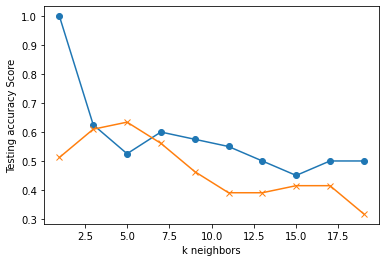

In [39]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range (1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_minmax, y_cat_train)
    train_score = knn.score(X_train_minmax, y_cat_train)
    test_score = knn.score(X_test_minmax, y_cat_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [42]:
#STEP 5: re-fit classifier with optimal k value
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_minmax, y_cat_train)
print("k=5 Test Acc: %.3f" %knn.score(X_test_minmax, y_cat_test))

k=5 Test Acc: 0.634


In [46]:
import pickle
pickle.dump(knn, open("../../models/knn_mob.pkl", "wb"))

In [47]:
with open("../../models/knn_mob.pkl", "rb") as f:
    model_object = pickle.load(f)
    f.close()